In [1]:
import numpy as np
import pandas as pd

In [2]:
!pip install gensim

In [3]:
import gensim
import os

Download data from here: https://www.kaggle.com/datasets/khulasasndh/game-of-thrones-books


In [4]:
from nltk import sent_tokenize
from gensim.utils import simple_preprocess

story = []
for filename in os.listdir('data'):
    
    f = open(os.path.join('data',filename))
    corpus = f.read()
    raw_sent = sent_tokenize(corpus)
    for sent in raw_sent:
        story.append(simple_preprocess(sent))

In [5]:
story[0]

['game',
 'of',
 'thrones',
 'book',
 'one',
 'of',
 'song',
 'of',
 'ice',
 'and',
 'fire',
 'by',
 'george',
 'martin',
 'prologue',
 'we',
 'should',
 'start',
 'back',
 'gared',
 'urged',
 'as',
 'the',
 'woods',
 'began',
 'to',
 'grow',
 'dark',
 'around',
 'them']

In [6]:
model = gensim.models.Word2Vec(
    window=10,
    min_count=2
)

In [7]:
model.build_vocab(story)

In [8]:
model.train(story, total_examples=model.corpus_count, epochs=model.epochs)

(6568410, 8628190)

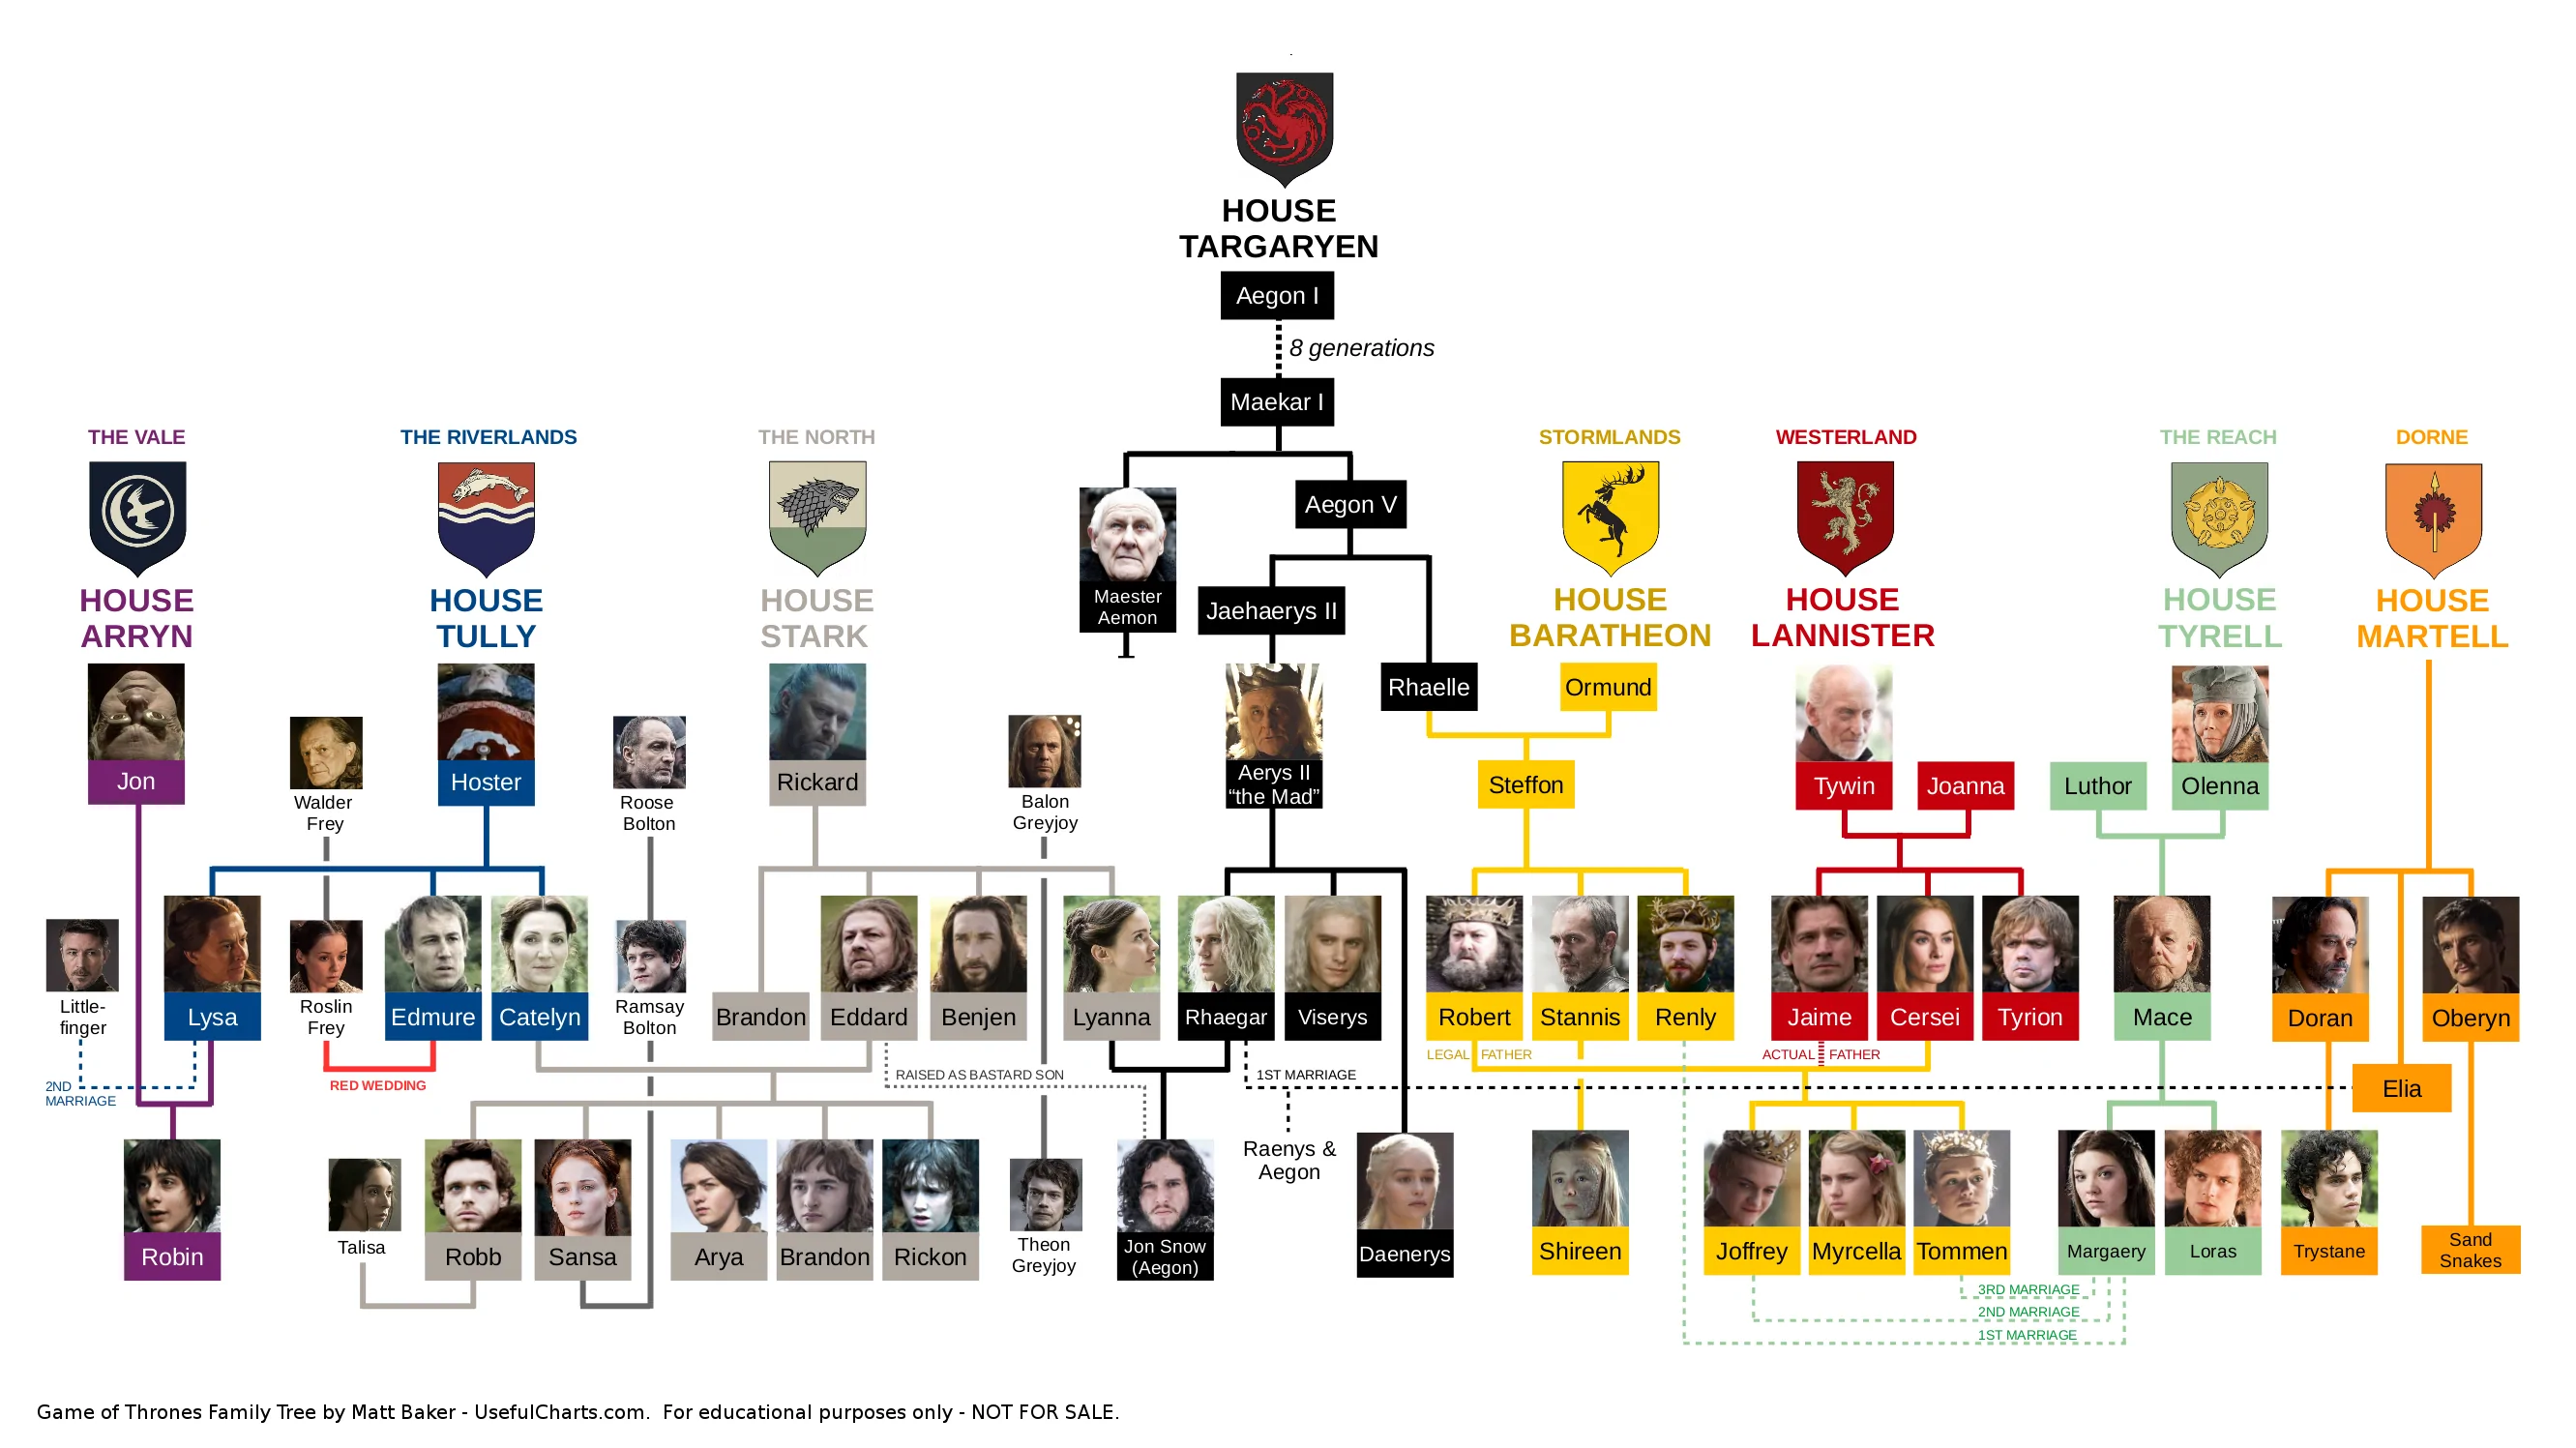

In [13]:
from IPython.display import Image
Image(filename='game-of-thrones-family-tree-season-7_3350358d-a69c-432c-a2d7-60c364913281.png') 

In [9]:
model.wv.most_similar('daenerys')

[('stormborn', 0.8010758757591248),
 ('targaryen', 0.765183687210083),
 ('myrcella', 0.7409245371818542),
 ('queen', 0.7315618395805359),
 ('princess', 0.7275505661964417),
 ('unburnt', 0.7029377818107605),
 ('elia', 0.6884893774986267),
 ('dorne', 0.6793866753578186),
 ('margaery', 0.6575116515159607),
 ('joffrey', 0.6453379392623901)]

In [10]:

model.wv.doesnt_match(['jon','rikon','robb','arya','sansa','bran'])

'jon'

In [11]:

model.wv.doesnt_match(['cersei', 'jaime', 'bronn', 'tyrion'])

'bronn'

In [14]:

model.wv['king']

array([ 2.5894825 ,  0.63418907,  1.7222805 ,  0.3158268 , -0.92913896,
        0.6086136 ,  1.5074184 ,  0.73673946, -2.9555929 ,  0.60760707,
       -2.5386424 , -1.2017233 , -0.22006899,  1.052849  , -3.2566562 ,
       -1.906926  ,  0.85361075,  1.7216145 ,  0.8826336 ,  1.2747399 ,
        1.9472657 , -0.97106475,  1.4916196 , -3.7178721 , -1.2581847 ,
        0.5581883 , -1.5576094 , -1.1615803 , -0.42694056,  0.70296   ,
       -2.2730336 ,  0.79539764,  2.075642  , -2.037316  ,  2.6996186 ,
       -4.1561756 , -3.7366683 , -0.53337604,  1.0197359 , -2.4030893 ,
       -0.02493559,  2.6796687 ,  1.5026382 , -0.8001276 , -0.8985968 ,
       -0.6044007 ,  2.1430907 , -1.0688969 ,  1.1609521 , -0.79038215,
       -3.308886  , -1.9472648 , -1.8888096 , -3.0980453 ,  2.8522582 ,
       -2.4780517 , -0.31417474,  1.1782092 ,  0.15152971,  0.87184536,
        0.8512158 ,  1.1980836 , -1.3181504 , -1.4815603 ,  0.794643  ,
        1.966616  , -0.88323843, -0.4506679 ,  0.28878108, -1.95

In [31]:
model.wv.most_similar(model.wv['king'] - model.wv['man'] + model.wv['woman'])

[('king', 0.8235968947410583),
 ('queen', 0.6332842111587524),
 ('targaryen', 0.6279946565628052),
 ('baratheon', 0.6159731149673462),
 ('prince', 0.6102628707885742),
 ('princess', 0.5754084587097168),
 ('daenerys', 0.5713372826576233),
 ('aegon', 0.5580098628997803),
 ('usurper', 0.5565516948699951),
 ('rhaegar', 0.5556110739707947)]

In [15]:
model.wv.similarity('arya','sansa')

0.8471881

In [16]:
model.wv.similarity('cersei','sansa')

0.75556684

In [17]:
model.wv.similarity('tywin','sansa')

0.28001425

In [25]:
y = model.wv.index_to_key
y[:10]

['the', 'and', 'to', 'of', 'he', 'his', 'was', 'you', 'her', 'in']

In [26]:
from sklearn.decomposition import PCA

In [27]:
pca = PCA(n_components=3)

In [28]:
X = pca.fit_transform(model.wv.get_normed_vectors())

In [29]:
X.shape

(17453, 3)

In [30]:
import plotly.express as px
fig = px.scatter_3d(X[200:300],x=0,y=1,z=2, color=y[200:300])
fig.show()